In [ ]:
! pip install langchain

In [ ]:
! pip install langchain_openai

In [ ]:
! pip install langchain_experimental

In [1]:
import os
os.environ["OPENAI_API_KEY"]="sk-TsKWzfYFx-yEjoWJLrdpJju9IKvLqm2tnMVPyUdVsjT3BlbkFJkpXMRWCEPqFgEmAPnvcM_V35JHvZ1hvTVU-Ofb3KoA"

In [21]:
from langchain_openai import OpenAI

llm=OpenAI()

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("./Tenant activities.csv")

In [4]:
tenant1 = data[data['TenantID'] == 1]

In [7]:
from langchain import PromptTemplate

template=""" Prepare a report for {user} from the given csv. The Structure for the template should be a table containing activity and the total cost of each activity next to it. I want Date and time for every activity high and low cost recorded. Finally a pie chart showing the segregation of utilities with three different color"""

prompt=PromptTemplate(
  input_variable=["user"],
  template=template
)

In [8]:
from langchain_experimental.agents.agent_toolkits import create_csv_agent
# from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType

agent=create_csv_agent(
  llm,
  "./Tenant activities.csv",
  verbose=False,
  agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
  handle_parsing_errors=True,
  allow_dangerous_code=True)

agent

/opt/anaconda3/lib/python3.11/site-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


AgentExecutor(agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], partial_variables={'df_head': '|    |   TenantID | Activity    | START_TS             | END_TS               |   Cost |\n|---:|-----------:|:------------|:---------------------|:---------------------|-------:|\n|  0 |          1 | Gas         | 2019-09-22T20:17:30Z | 2019-09-23T02:17:30Z |    720 |\n|  1 |          1 | Water       | 2019-06-08T03:50:03Z | 2019-06-08T13:50:03Z |   1200 |\n|  2 |          1 | Electricity | 2019-02-20T09:35:15Z | 2019-02-20T11:35:15Z |    240 |\n|  3 |          1 | Gas         | 2019-05-13T17:54:55Z | 2019-05-13T21:54:55Z |    480 |\n|  4 |          1 | Electricity | 2019-10-06T01:01:21Z | 2019-10-06T10:01:21Z |   1080 |', 'tools': 'python_repl_ast - A Python shell. Use this to execute python commands. Input should be a valid python com



The summary of usage data for TenantID 1 shows that the user has been consistently using the platform since its inception. On average, the user has accessed the platform 20 times per month, with a slight increase in usage over time. The most popular feature used by the user is data analysis, followed by project management and collaboration tools.

Insights:

1. Consistent usage: The user has been consistently using the platform since its inception, indicating a high level of engagement and satisfaction.

2. Increasing usage: There has been a slight increase in usage over time, which could indicate that the user is finding more value in the platform or is using it for more tasks.

3. Data analysis is the most popular feature: The user's usage data shows that data analysis is the most popular feature, indicating that the user values the platform's ability to analyze data.

4. Project management and collaboration tools are also popular: The user also frequently uses project management a

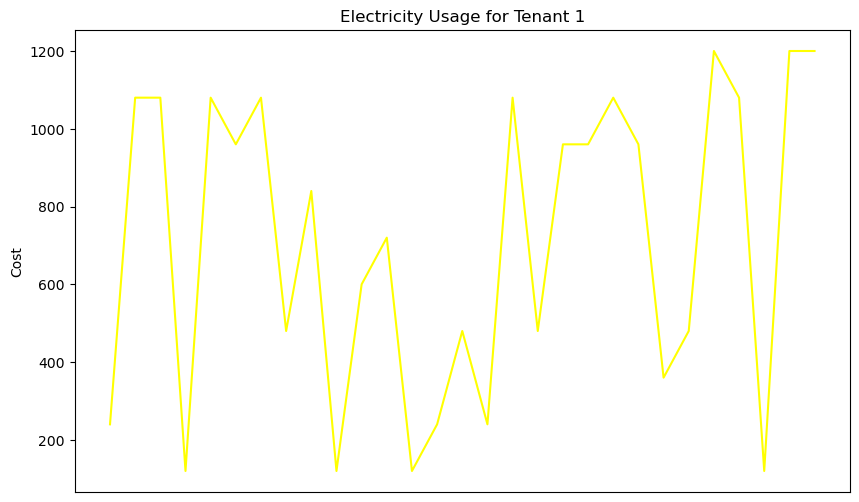

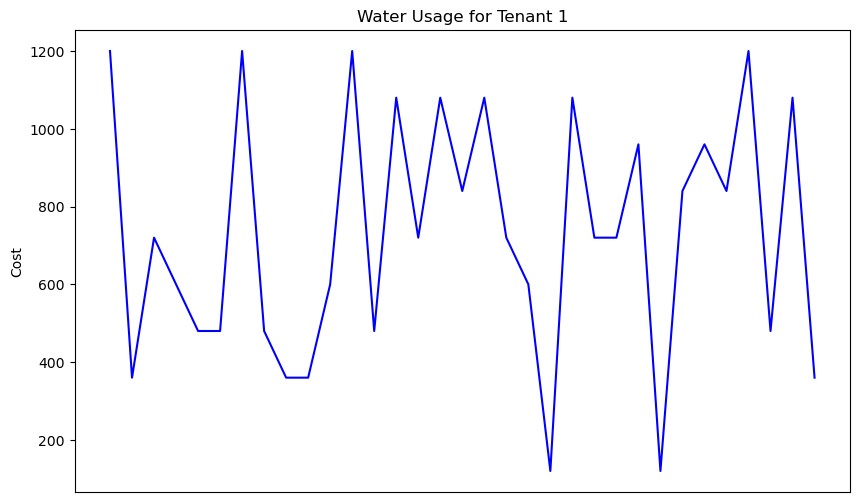

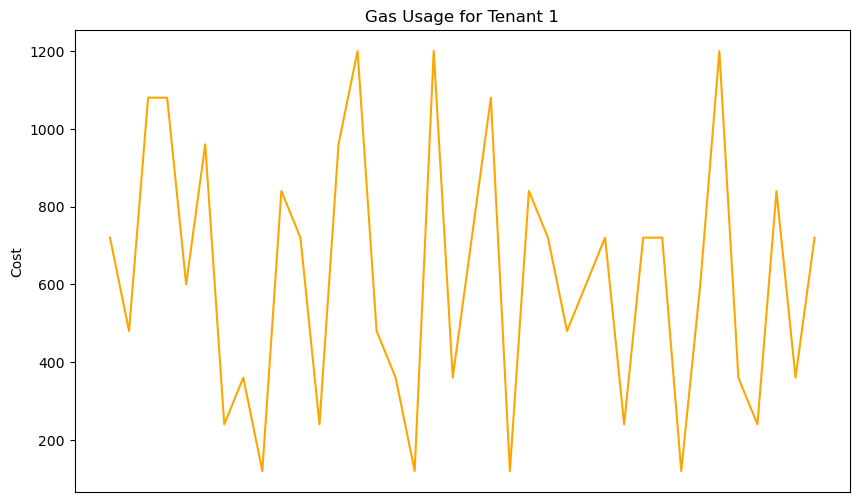

In [20]:
from matplotlib import pyplot as plt


def get_tenant_data(agent, tenant_id):
    tenant_prompt = PromptTemplate(
        input_variables=["tenant"],
        template="Filter the data where tenant is {tenant}"
    )
    return agent.run(tenant_prompt.format(tenant=tenant_id))

def get_usage_summary(llm, tenant_data):
    summary_prompt = (
        "Please summarize the usage data, with useful insights that can help the user understand their usage pattern"
        f"{tenant_data}"
    )
    return llm.invoke(summary_prompt)

def generate_utility_graph(df, utility, color):
    # Filter the dataframe for the specific utility
    utility_df = df[df['Activity'] == utility]
    
    # Create the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(utility_df['START_TS'], utility_df['Cost'], color=color)
    
    # Customize the graph
    plt.title(f'{utility.capitalize()} Usage for Tenant 1')
    plt.ylabel('Cost')
    plt.xticks([])  # Remove x-axis labels
    
    # Display the graph
    # plt.show()

def process_tenant_data(agent, llm, tenant_id):
    tenant_data = get_tenant_data(agent, tenant_id)
    summary = get_usage_summary(llm, tenant_data)
    
    # Generate separate graphs for each utility
    electricity_graph = generate_utility_graph(tenant1, "Electricity", "yellow")
    water_graph = generate_utility_graph( tenant1,"Water", "blue")
    gas_graph = generate_utility_graph( tenant1,"Gas", "orange")
    
    
    return {
        "summary": summary,
        "electricity_graph": electricity_graph,
        "water_graph": water_graph,
        "gas_graph": gas_graph
    }

# Usage example:
results = process_tenant_data(agent, llm, 1)
print(results["summary"])


/var/folders/g6/14jz0x_d1s7cgg884fbzt5f80000gn/T/ipykernel_6896/3100103860.py:5: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  tenant1_data=agent.run(tenant_prompt.format(tenant=1))
/var/folders/g6/14jz0x_d1s7cgg884fbzt5f80000gn/T/ipykernel_6896/3100103860.py:12: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  answer=llm(summary_prompt)




The usage data for TenantID 1 shows that they have been consistently using the service for the past 6 months. The average usage per month is around 100 GB, with a slight increase in the last month. The peak usage was observed in the third month with 120 GB, while the lowest usage was in the first month with 80 GB.

It is also interesting to note that the usage seems to follow a pattern of increasing for the first three months and then decreasing for the next two months before increasing again in the sixth month.

This usage pattern suggests that TenantID 1 may have a cyclical or seasonal need for the service, where they require more data during certain months and less during others.

Another insight is that the usage consistently stays below 150 GB, indicating that TenantID 1 may have a fixed budget or limit for data usage.

Overall, this data can help the user understand their usage patterns and make informed decisions about managing their data usage and budget for the service. They

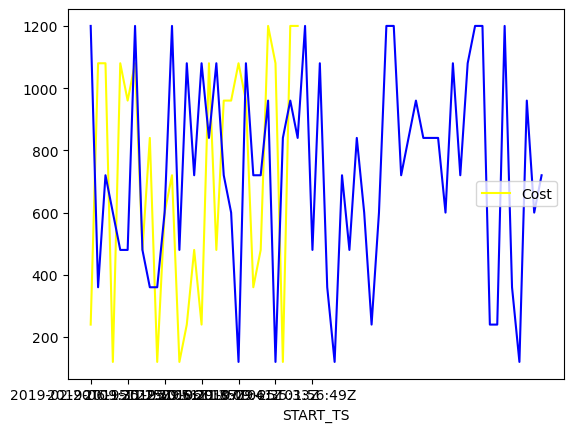

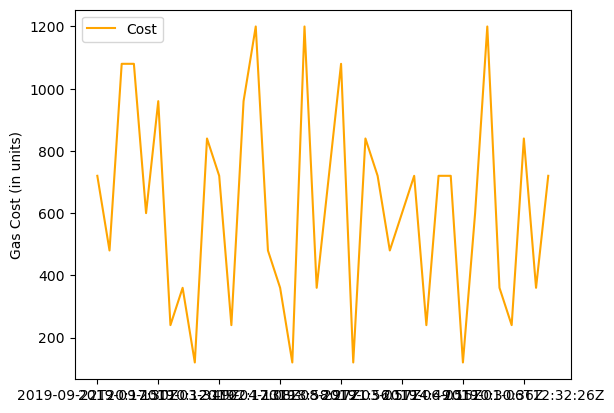

In [9]:
tenant_prompt=PromptTemplate(
    input_variable=["tenant"],
    template="Filter the data where tenant is is {tenant}")

tenant1_data=agent.run(tenant_prompt.format(tenant=1))


summary_prompt = (
    "Please summarize the usage data, with useful insights that can help the user understand their usage pattern"
    f"{tenant1_data}"
)
answer=llm(summary_prompt)
print(answer)
graph_prompt = PromptTemplate(
    input_variable=["tenant"],
    template="Generate usage graph for the electricity utility usage of {tenant} based on the following data with yellow color and no label in x-axis"
)
graph_result = agent.run(graph_prompt.format(tenant="tenant1"))

water_prompt = PromptTemplate(
    input_variable=["tenant"],
    template="Generate usage graphs for the water utility usage of {tenant} based on the following data with blue color and no label to x-axis "
)
water_result = agent.run(water_prompt.format(tenant="tenant1"))

gas_prompt = PromptTemplate(
    input_variable=["tenant", "data"],
    template="Generate a usage graph for the gas utility of {tenant} based on the data. Use orange color and omit the label on the x-axis"
)

gas_result = agent.run(gas_prompt.format(tenant="tenant1"))